In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.rcParams['font.family'] = 'simhei'
plt.rcParams['axes.unicode_minus'] = False

data = pd.read_csv('./data/students_info.csv')
data.head(3)

,学号,院系,专业,班级,性别,年级,B1,B2,G1,G2,G3,G,班级排名,院系排名
0,176302110,计算机工程学院,动漫制作技术,17动漫制作技术1,女,2017,3.5776,0.05,4.0,3.6276,4.0,3.77656,1,1
1,176302118,计算机工程学院,动漫制作技术,17动漫制作技术1,女,2017,3.5714,0.05,4.0,3.6214,4.0,3.77284,2,2
2,176302102,计算机工程学院,动漫制作技术,17动漫制作技术1,女,2017,3.5673,0.05,4.0,3.6173,4.0,3.77038,3,3


In [3]:
df = data.drop('院系', axis=1)
df.head(3)

,学号,专业,班级,性别,年级,B1,B2,G1,G2,G3,G,班级排名,院系排名
0,176302110,动漫制作技术,17动漫制作技术1,女,2017,3.5776,0.05,4.0,3.6276,4.0,3.77656,1,1
1,176302118,动漫制作技术,17动漫制作技术1,女,2017,3.5714,0.05,4.0,3.6214,4.0,3.77284,2,2
2,176302102,动漫制作技术,17动漫制作技术1,女,2017,3.5673,0.05,4.0,3.6173,4.0,3.77038,3,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404 entries, 0 to 1403
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   学号      1404 non-null   int64  
 1   专业      1404 non-null   object 
 2   班级      1404 non-null   object 
 3   性别      1404 non-null   object 
 4   年级      1404 non-null   int64  
 5   B1      1404 non-null   float64
 6   B2      1389 non-null   float64
 7   G1      1404 non-null   float64
 8   G2      1404 non-null   float64
 9   G3      1404 non-null   float64
 10  G       1404 non-null   float64
 11  班级排名    1404 non-null   int64  
 12  院系排名    1404 non-null   int64  
dtypes: float64(6), int64(4), object(3)
memory usage: 142.7+ KB


In [5]:
# 查看重复行数量
df.duplicated().sum()

4

In [6]:
# 查看重复行
df[df.duplicated()]

,学号,专业,班级,性别,年级,B1,B2,G1,G2,G3,G,班级排名,院系排名
19,176302109,动漫制作技术,17动漫制作技术1,女,2017,3.3939,0.05,4.0,3.4439,3.3,3.52634,10,12
369,176305225,计算机应用技术(对口),17计算机应用技术3(对),男,2017,1.7844,0.05,4.0,1.8344,2.0,2.30064,38,37
450,176301312,软件技术,17软件技术3,男,2017,3.1615,0.05,4.0,3.2115,3.7,3.46690,4,4
986,186305138,计算机应用技术(对口),18计算机应用技术(2)对,男,2018,2.6587,0.05,4.0,2.7087,4.0,3.22522,16,25


In [7]:
# 删除重复行
df1 = df.drop_duplicates()
len(df1)

1400

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1400 entries, 0 to 1403
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   学号      1400 non-null   int64  
 1   专业      1400 non-null   object 
 2   班级      1400 non-null   object 
 3   性别      1400 non-null   object 
 4   年级      1400 non-null   int64  
 5   B1      1400 non-null   float64
 6   B2      1385 non-null   float64
 7   G1      1400 non-null   float64
 8   G2      1400 non-null   float64
 9   G3      1400 non-null   float64
 10  G       1400 non-null   float64
 11  班级排名    1400 non-null   int64  
 12  院系排名    1400 non-null   int64  
dtypes: float64(6), int64(4), object(3)
memory usage: 153.1+ KB


In [9]:
# 查看各列缺失值情况
df1.isnull().sum()

学号       0
专业       0
班级       0
性别       0
年级       0
B1       0
B2      15
G1       0
G2       0
G3       0
G        0
班级排名     0
院系排名     0
dtype: int64

In [10]:
# 查看哪些行有缺失值
df1[df1.isnull().T.any()]

,学号,专业,班级,性别,年级,B1,B2,G1,G2,G3,G,班级排名,院系排名
183,176306235,计算机网络技术,17计算机网络技术2,男,2017,0.2800,NaN,4.0,0.2800,2.3,1.42800,46,46
365,176301134,软件技术,17软件技术1,男,2017,0.4981,NaN,4.0,0.4981,1.0,1.29886,46,46
561,156307319,物联网应用技术,17物联网应用技术2,男,2017,2.5020,NaN,4.0,2.5020,3.0,2.90120,16,29
724,186307103,动漫制作技术,18动漫制作技术1,女,2018,2.0143,NaN,4.0,2.0143,4.0,2.80858,27,39
729,186307128,动漫制作技术,18动漫制作技术1,男,2018,2.5089,NaN,4.0,2.5089,1.5,2.60534,32,28
734,186307113,动漫制作技术,18动漫制作技术1,女,2018,1.7893,NaN,4.0,1.7893,3.3,2.53358,37,42
736,186307102,动漫制作技术,18动漫制作技术1,女,2018,1.5125,NaN,4.0,1.5125,3.7,2.44750,39,43
738,186307126,动漫制作技术,18动漫制作技术1,男,2018,2.1125,NaN,4.0,2.1125,1.0,2.26750,41,38
779,186307213,动漫制作技术,18动漫制作技术2,女,2018,2.1357,NaN,4.0,2.1357,3.3,2.74142,39,40
814,186302112,计算机网络技术,18计算机网络技术1,男,2018,1.9653,NaN,4.0,1.9653,1.0,2.17918,31,21


In [11]:
# 删除有空值的行
# df2 = df1.dropna(how='any',axis=0)
# len(df2)

In [13]:
# 将空值替换为平均值，并保留三位小数
df1['B2'] = df1['B2'].fillna(df1['B2'].mean().round(3))

<ipython-input-13-8ed93d97c42e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['B2'] = df1['B2'].fillna(df1['B2'].mean().round(3))


In [14]:
df1.isnull().sum()

学号      0
专业      0
班级      0
性别      0
年级      0
B1      0
B2      0
G1      0
G2      0
G3      0
G       0
班级排名    0
院系排名    0
dtype: int64

In [15]:
# df1.to_csv('./a.csv',index=False)

In [16]:
# 各专业评优人数，count()函数用来实现计数
d1 = df1['B2'].groupby(df['专业']).count()
d1

专业
动漫制作技术         179
物联网应用技术        221
移动应用开发         184
计算机应用技术         99
计算机应用技术(对口)    161
计算机网络技术        176
计算机网络技术(对口)     38
软件技术           342
Name: B2, dtype: int64

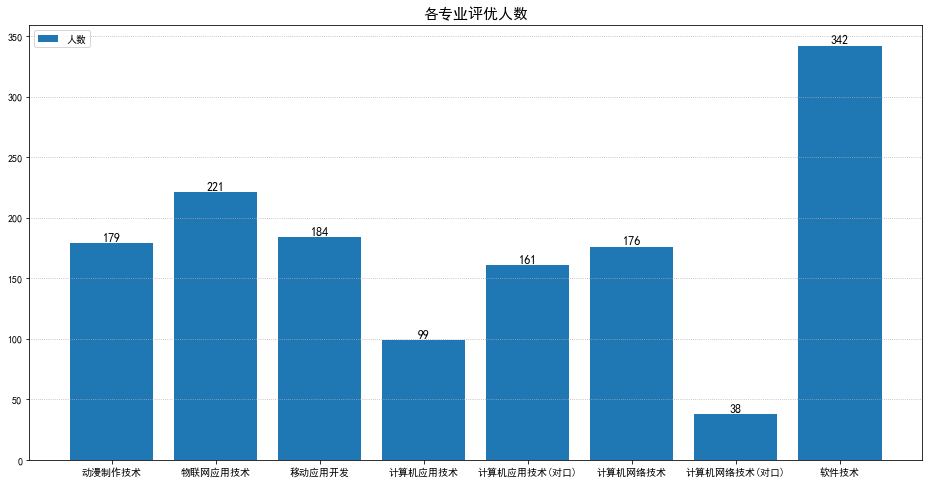

In [17]:
plt.figure(figsize=(16, 8))
plt.title('各专业评优人数', fontsize=15)
plt.bar(d1.index, d1.values, label='人数')
for x, y in enumerate(d1.values):
    plt.text(x, y, y, ha='center', va='bottom', fontsize=12)
plt.grid(axis='y', ls=':')
plt.legend()
plt.show()

In [18]:
#  查看男女占比情况
d2 = df1['B2'].groupby(by=df1['性别']).count()
d2

性别
女    454
男    946
Name: B2, dtype: int64

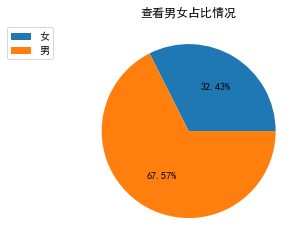

In [19]:
plt.figure(facecolor='w')
plt.title('查看男女占比情况',fontsize=12)
plt.pie(d2.values,autopct='%.2f%%',)
plt.legend(d2.index,fontsize=10,bbox_to_anchor=[-0.6,0,0.5,1])
plt.show()

<AxesSubplot:title={'center':'B1'}, xlabel='[专业]'>

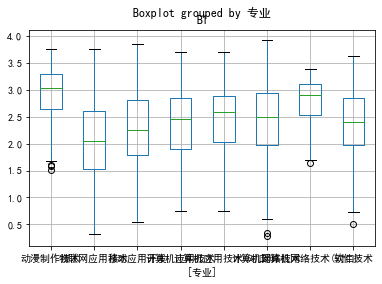

In [24]:
df1.boxplot(column=["B1"],by=['专业'])